In [1]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
dynamic_data = pd.read_csv('sph_dynamic.csv')

In [4]:
static_data = pd.read_csv('sph_static.csv')

In [5]:
# Missing Values in Dynamic Table
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
total_protein          6930
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
heart_rate             6833
sbp                    6895
dbp                    6895
mbp                    6887
resp_rate              6832
temperature            6974
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
bilirubin_direct       6808
bilirubin_indirect     6812
ph                     7004
lactate                7012
pt                     3068
urineoutput            6942
sofa_respiration       7005
sofa_coagulation       7023
sofa_liver             7023
sofa_cardiovascular    6872
sofa_cns               6979
sofa_renal             7024
dtype: int64

In [6]:
# Drop the columns with more than 80%
for col in dynamic_data.columns:
    if dynamic_data[col].isnull().sum() > len(dynamic_data)*0.8:
        del dynamic_data[col]

In [7]:
dynamic_data.isnull().sum()

stay_id               0
charttime             0
calcium             933
creatinine          261
glucose             444
sodium              214
chloride            241
hemoglobin         1179
wbc                1207
alt                3964
ast                3936
alp                3976
bilirubin_total    3957
pt                 3068
dtype: int64

In [8]:
# ['alt','ast','alp','bilirubin_total','pt'] are liver function related test results
# create a new binary column 'liver_function_test', True/1 means have ever taken liver function test
liver_test_result = ['alt','ast','alp','bilirubin_total','pt']
def liver_categorize(group):
    flag = True
    for i in liver_test_result:
        if group[i].notnull().any():
            flag = False
    if flag:
        group['liver_function_test'] = False
    else:
        group['liver_function_test'] = True
    return group

dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)

C:\Users\Mervin\AppData\Local\Temp\ipykernel_52668\240455136.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)


In [9]:
dynamic_data

stay_id                charttime  calcium  creatinine  glucose  sodium  \
0     35715575  2148-12-27 18:15:00.000      8.5         0.9    137.0   138.0   
1     34483718  2118-01-04 03:58:00.000      8.2         0.8    129.0   141.0   
2     31826892  2163-03-10 19:59:00.000      7.7         0.4    112.0   136.0   
3     36154799  2131-12-02 19:14:00.000      NaN         NaN      NaN     NaN   
4     32732521  2116-08-12 12:45:00.000      NaN         4.0    135.0   139.0   
...        ...                      ...      ...         ...      ...     ...   
7019  31292653  2192-03-18 03:14:00.000      NaN         1.4    102.0   137.0   
7020  32964221  2127-01-30 10:00:00.000      8.6         0.5    112.0   139.0   
7021  33493321  2142-07-28 06:02:00.000      NaN         1.1    130.0   142.0   
7022  38658392  2189-05-17 00:13:00.000      7.3         1.0    174.0   133.0   
7023  37805633  2172-07-28 21:25:00.000      8.3         0.9    155.0   144.0   

      chloride  hemoglobin   wbc   alt   ast    alp  bilirubin_total    pt  \
0        104.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
1        101.0         8.7  11.3   NaN   NaN    NaN              NaN  12.1   
2         98.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
3          NaN        12.3   NaN   NaN   NaN    NaN              NaN   NaN   
4        105.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
...        ...         ...   ...   ...   ...    ...              ...   ...   
7019     103.0         8.7   4.9   NaN   NaN    NaN              NaN   NaN   
7020     107.0         8.9  14.3  14.0  32.0  148.0              2.6   NaN   
7021     105.0         8.4   4.0   NaN   NaN    NaN              NaN   NaN   
7022      93.0        13.0  19.5   9.0  18.0   48.0              0.5  13.0   
7023     110.0        12.1   5.4   NaN   NaN    NaN              NaN   NaN   

      liver_function_test  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  
...                   ...  
7019                 True  
7020                 True  
7021                 True  
7022                 True  
7023                False  

[7024 rows x 15 columns]

In [10]:
dynamic_data.describe()

stay_id      calcium   creatinine      glucose       sodium  \
count  7.024000e+03  6091.000000  6763.000000  6580.000000  6810.000000   
mean   3.497892e+07     8.389640     1.644019   142.289666   137.309545   
std    2.832325e+06     0.820066     1.839893    89.875986     5.638384   
min    3.000414e+07     4.200000     0.100000    30.000000    83.000000   
25%    3.255070e+07     7.900000     0.800000   102.000000   134.000000   
50%    3.496990e+07     8.400000     1.100000   125.000000   138.000000   
75%    3.746081e+07     8.900000     1.800000   159.000000   141.000000   
max    3.999217e+07    12.300000    19.700000  2970.000000   185.000000   

          chloride   hemoglobin          wbc           alt           ast  \
count  6783.000000  5845.000000  5817.000000   3060.000000   3088.000000   
mean    102.067079    10.043353    10.973130    161.859150    243.882772   
std       6.731008     2.177573     8.228807    752.898832   1216.527439   
min      62.000000     3.900000     0.100000      1.000000      5.000000   
25%      98.000000     8.400000     5.900000     17.000000     22.000000   
50%     102.000000     9.800000     9.400000     30.000000     42.000000   
75%     106.000000    11.400000    14.200000     62.000000     95.000000   
max     153.000000    18.400000   125.200000  15018.000000  28275.000000   

               alp  bilirubin_total           pt  
count  3048.000000      3067.000000  3956.000000  
mean    131.933727         4.248745    18.826567  
std     123.088598         7.808056    11.588015  
min       7.000000         0.100000     9.200000  
25%      65.000000         0.500000    12.800000  
50%      92.000000         1.000000    14.900000  
75%     149.000000         3.600000    20.400000  
max    1185.000000        52.600000   150.000000

In [11]:
# Assume that patients with no relevant results recorded don't have liver issues
# so we impute these patients' missing values of these columns with random number in normal range

# but i can not find the unit and normal range for them so i drop them first >_<
# dynamic_data.drop(['alt','ast','alp','bilirubin_total','pt'], axis = 1, inplace = True)

In [12]:
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
pt                     3068
liver_function_test       0
dtype: int64

In [13]:
# use KNN to impute the rest
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10)
dynamic_data.iloc[:,2:] = imputer.fit_transform(dynamic_data.iloc[:,2:])

In [14]:
dynamic_data.isnull().sum()

stay_id                0
charttime              0
calcium                0
creatinine             0
glucose                0
sodium                 0
chloride               0
hemoglobin             0
wbc                    0
alt                    0
ast                    0
alp                    0
bilirubin_total        0
pt                     0
liver_function_test    0
dtype: int64

In [15]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count     349.000000
mean      105.019771
std       132.120378
min        17.700000
25%        52.600000
50%        71.400000
75%        99.900000
max      1268.700000
Name: alt, dtype: float64
count     349.000000
mean      235.668195
std       498.155651
min        26.600000
25%        60.800000
50%        92.300000
75%       197.100000
max      3044.800000
Name: ast, dtype: float64
count    349.000000
mean     162.377364
std       67.662683
min       67.800000
25%      107.400000
50%      144.300000
75%      204.800000
max      341.100000
Name: alp, dtype: float64
count    349.000000
mean       3.055330
std        2.646388
min        0.500000
25%        0.940000
50%        1.920000
75%        4.300000
max       13.730000
Name: bilirubin_total, dtype: float64
count    349.000000
mean      17.357536
std        3.010900
min       12.860000
25%       15.140000
50%       16.420000
75%       19.160000
max       35.340000
Name: pt, dtype: float64


In [16]:
# define normal ranges for each column
normal_ranges = {
    'alt': (5, 40),
    'ast': (10, 35),
    'alp': (40, 130),
    'bilirubin_total': (0.1, 1.0),
    'pt': (9.5, 13.5)
}


In [17]:
mask = dynamic_data['liver_function_test'] == False
n_no_test = mask.sum()
def sample_normal(col):
    lower = normal_ranges[col][0]
    upper = normal_ranges[col][1]
    return np.random.normal(loc=(lower+upper)/2, scale=(upper-lower)/6, size=n_no_test)

sampled_alt = sample_normal("alt")
sampled_ast = sample_normal("ast")
sampled_alp = sample_normal("alp")
sampled_bilirubin_total = sample_normal("bilirubin_total")
sampled_pt = sample_normal("pt")
dynamic_data.loc[mask, 'alt'] = sampled_alt
dynamic_data.loc[mask, 'ast'] = sampled_ast
dynamic_data.loc[mask, 'alp'] = sampled_alp
dynamic_data.loc[mask, 'bilirubin_total'] = sampled_bilirubin_total
dynamic_data.loc[mask, 'pt'] = sampled_pt

In [18]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    349.000000
mean      22.906691
std        6.035705
min        4.271989
25%       18.852146
50%       22.558224
75%       26.984258
max       41.910583
Name: alt, dtype: float64
count    349.000000
mean      22.628790
std        4.251407
min       12.128891
25%       19.540484
50%       22.726798
75%       25.676467
max       33.547988
Name: ast, dtype: float64
count    349.000000
mean      84.742829
std       14.098757
min       40.984591
25%       75.444296
50%       84.724760
75%       94.475013
max      116.991242
Name: alp, dtype: float64
count    349.000000
mean       0.548247
std        0.146097
min        0.217744
25%        0.446311
50%        0.545614
75%        0.624806
max        0.968588
Name: bilirubin_total, dtype: float64
count    349.000000
mean      11.533079
std        0.641697
min        9.556967
25%       11.079308
50%       11.584905
75%       11.959741
max       13.604452
Name: pt, dtype: float64


In [19]:
# take the mean values of all timepoints for each patient
dynamic_data_mean = dynamic_data.drop(['charttime'],axis = 1).groupby('stay_id').mean().reset_index()

In [20]:
# merge dynamic and static table
data = static_data.merge(dynamic_data_mean, on = 'stay_id')

In [21]:
dynamic_data_mean.shape

(1923, 14)

In [22]:
static_data.shape

(1923, 5)

In [23]:
data.shape

(1923, 18)

In [24]:
data

stay_id               icu_intime      vent_start        vent_end  \
0     30004144  2126-04-04 13:20:25.000    4/5/26 16:00    4/6/26 17:00   
1     30005366  2202-12-27 17:36:59.000  12/28/02 14:00  12/28/02 20:00   
2     30006983  2159-10-12 03:56:42.000  10/12/59 18:00  10/14/59 19:00   
3     30023204  2124-07-09 16:43:55.000   7/11/24 16:00   7/12/24 16:10   
4     30031418  2156-03-05 14:11:00.000    3/7/56 22:06     3/8/56 8:00   
...        ...                      ...             ...             ...   
1918  39977971  2115-12-11 17:42:45.000  12/12/15 12:00  12/12/15 16:00   
1919  39982332  2180-03-01 22:35:04.000    3/2/80 19:00     3/3/80 8:00   
1920  39985110  2141-03-03 05:57:46.000    3/4/41 20:44     3/6/41 4:00   
1921  39986206  2183-06-19 23:25:31.000   6/20/83 22:00    6/30/83 4:00   
1922  39992167  2114-06-10 19:00:00.000   6/11/14 17:00    6/15/14 5:00   

      vent_duration    calcium  creatinine     glucose      sodium  \
0         25.000000   7.400000    0.700000  123.500000  135.000000   
1          6.000000   8.800000    6.700000   41.000000  139.000000   
2         49.000000   7.550000    0.900000  122.500000  134.000000   
3         24.166667   8.033333    1.466667  110.000000  131.000000   
4          9.900000   7.400000    0.400000  133.000000  139.000000   
...             ...        ...         ...         ...         ...   
1918       4.000000   8.542500    2.335000  146.200000  133.150000   
1919      13.000000   8.820000    1.200000  119.000000  140.000000   
1920      31.266667  10.233333    5.866667  133.333333  138.333333   
1921     222.000000   7.550000    5.800000  111.000000  139.000000   
1922      84.000000   7.700000    0.850000  124.500000  129.500000   

        chloride  hemoglobin        wbc         alt      ast     alp  \
0     102.500000   12.400000   4.950000  100.700000  104.350  211.70   
1     100.000000    9.200000   9.400000   79.900000   88.400  141.40   
2     105.000000    9.705000   8.805000   45.500000  109.500  294.50   
3     101.333333    7.666667  20.733333   48.700000   64.900  145.00   
4     106.000000   10.560000  10.870000  128.000000  131.000  306.00   
...          ...         ...        ...         ...      ...     ...   
1918   98.300000   11.255000   9.330000   59.750000   60.475  165.05   
1919  103.000000   11.500000   4.700000   19.000000   36.000   91.00   
1920   98.000000   12.266667   8.366667   89.366667   92.500  169.20   
1921  103.000000   10.200000  18.750000   31.150000   62.800  108.70   
1922  100.000000    6.800000   5.300000   57.550000   71.400  116.30   

      bilirubin_total         pt  liver_function_test  
0            0.980000  13.100000                  1.0  
1            0.850000  32.100000                  1.0  
2            8.300000  20.650000                  1.0  
3            1.056667  12.330000                  1.0  
4            1.000000  13.620000                  1.0  
...               ...        ...                  ...  
1918         0.725000  12.675000                  1.0  
1919         0.300000  14.000000                  1.0  
1920         1.110000  13.743333                  1.0  
1921         0.725000  15.250000                  1.0  
1922         2.400000  17.250000                  1.0  

[1923 rows x 18 columns]

In [25]:
data

stay_id               icu_intime      vent_start        vent_end  \
0     30004144  2126-04-04 13:20:25.000    4/5/26 16:00    4/6/26 17:00   
1     30005366  2202-12-27 17:36:59.000  12/28/02 14:00  12/28/02 20:00   
2     30006983  2159-10-12 03:56:42.000  10/12/59 18:00  10/14/59 19:00   
3     30023204  2124-07-09 16:43:55.000   7/11/24 16:00   7/12/24 16:10   
4     30031418  2156-03-05 14:11:00.000    3/7/56 22:06     3/8/56 8:00   
...        ...                      ...             ...             ...   
1918  39977971  2115-12-11 17:42:45.000  12/12/15 12:00  12/12/15 16:00   
1919  39982332  2180-03-01 22:35:04.000    3/2/80 19:00     3/3/80 8:00   
1920  39985110  2141-03-03 05:57:46.000    3/4/41 20:44     3/6/41 4:00   
1921  39986206  2183-06-19 23:25:31.000   6/20/83 22:00    6/30/83 4:00   
1922  39992167  2114-06-10 19:00:00.000   6/11/14 17:00    6/15/14 5:00   

      vent_duration    calcium  creatinine     glucose      sodium  \
0         25.000000   7.400000    0.700000  123.500000  135.000000   
1          6.000000   8.800000    6.700000   41.000000  139.000000   
2         49.000000   7.550000    0.900000  122.500000  134.000000   
3         24.166667   8.033333    1.466667  110.000000  131.000000   
4          9.900000   7.400000    0.400000  133.000000  139.000000   
...             ...        ...         ...         ...         ...   
1918       4.000000   8.542500    2.335000  146.200000  133.150000   
1919      13.000000   8.820000    1.200000  119.000000  140.000000   
1920      31.266667  10.233333    5.866667  133.333333  138.333333   
1921     222.000000   7.550000    5.800000  111.000000  139.000000   
1922      84.000000   7.700000    0.850000  124.500000  129.500000   

        chloride  hemoglobin        wbc         alt      ast     alp  \
0     102.500000   12.400000   4.950000  100.700000  104.350  211.70   
1     100.000000    9.200000   9.400000   79.900000   88.400  141.40   
2     105.000000    9.705000   8.805000   45.500000  109.500  294.50   
3     101.333333    7.666667  20.733333   48.700000   64.900  145.00   
4     106.000000   10.560000  10.870000  128.000000  131.000  306.00   
...          ...         ...        ...         ...      ...     ...   
1918   98.300000   11.255000   9.330000   59.750000   60.475  165.05   
1919  103.000000   11.500000   4.700000   19.000000   36.000   91.00   
1920   98.000000   12.266667   8.366667   89.366667   92.500  169.20   
1921  103.000000   10.200000  18.750000   31.150000   62.800  108.70   
1922  100.000000    6.800000   5.300000   57.550000   71.400  116.30   

      bilirubin_total         pt  liver_function_test  
0            0.980000  13.100000                  1.0  
1            0.850000  32.100000                  1.0  
2            8.300000  20.650000                  1.0  
3            1.056667  12.330000                  1.0  
4            1.000000  13.620000                  1.0  
...               ...        ...                  ...  
1918         0.725000  12.675000                  1.0  
1919         0.300000  14.000000                  1.0  
1920         1.110000  13.743333                  1.0  
1921         0.725000  15.250000                  1.0  
1922         2.400000  17.250000                  1.0  

[1923 rows x 18 columns]

In [26]:
#Converting data type of icu_intime, vent_start and vent_end to date and time format
data['icu_intime'] = pd.to_datetime(data['icu_intime'])
data['vent_start'] = pd.to_datetime(data['vent_start'], format='%m/%d/%y %H:%M')
data['vent_end'] = pd.to_datetime(data['vent_end'], format='%m/%d/%y %H:%M')

In [27]:
data.dtypes

stay_id                         int64
icu_intime             datetime64[ns]
vent_start             datetime64[ns]
vent_end               datetime64[ns]
vent_duration                 float64
calcium                       float64
creatinine                    float64
glucose                       float64
sodium                        float64
chloride                      float64
hemoglobin                    float64
wbc                           float64
alt                           float64
ast                           float64
alp                           float64
bilirubin_total               float64
pt                            float64
liver_function_test           float64
dtype: object

<Axes: >

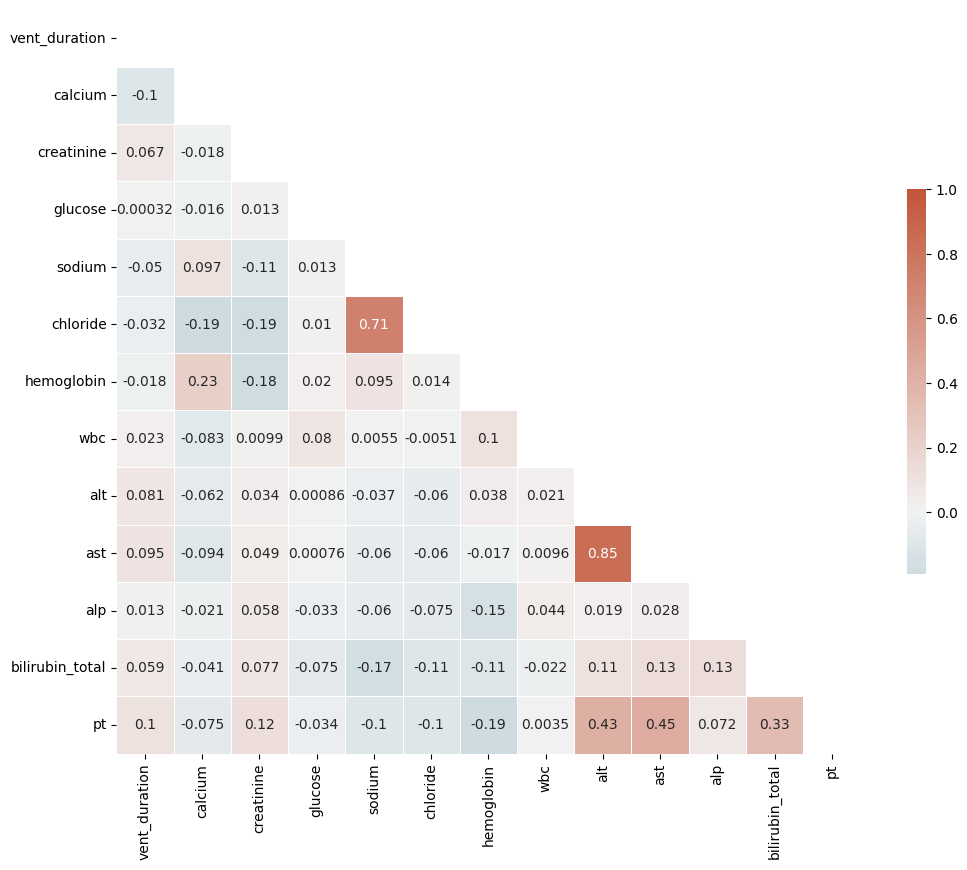

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#Dropped icu_intime, vent_start and vent_end as they are usable for correlation
#Creating correlation matrix to observe the relationship between variables
df_corr = data.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


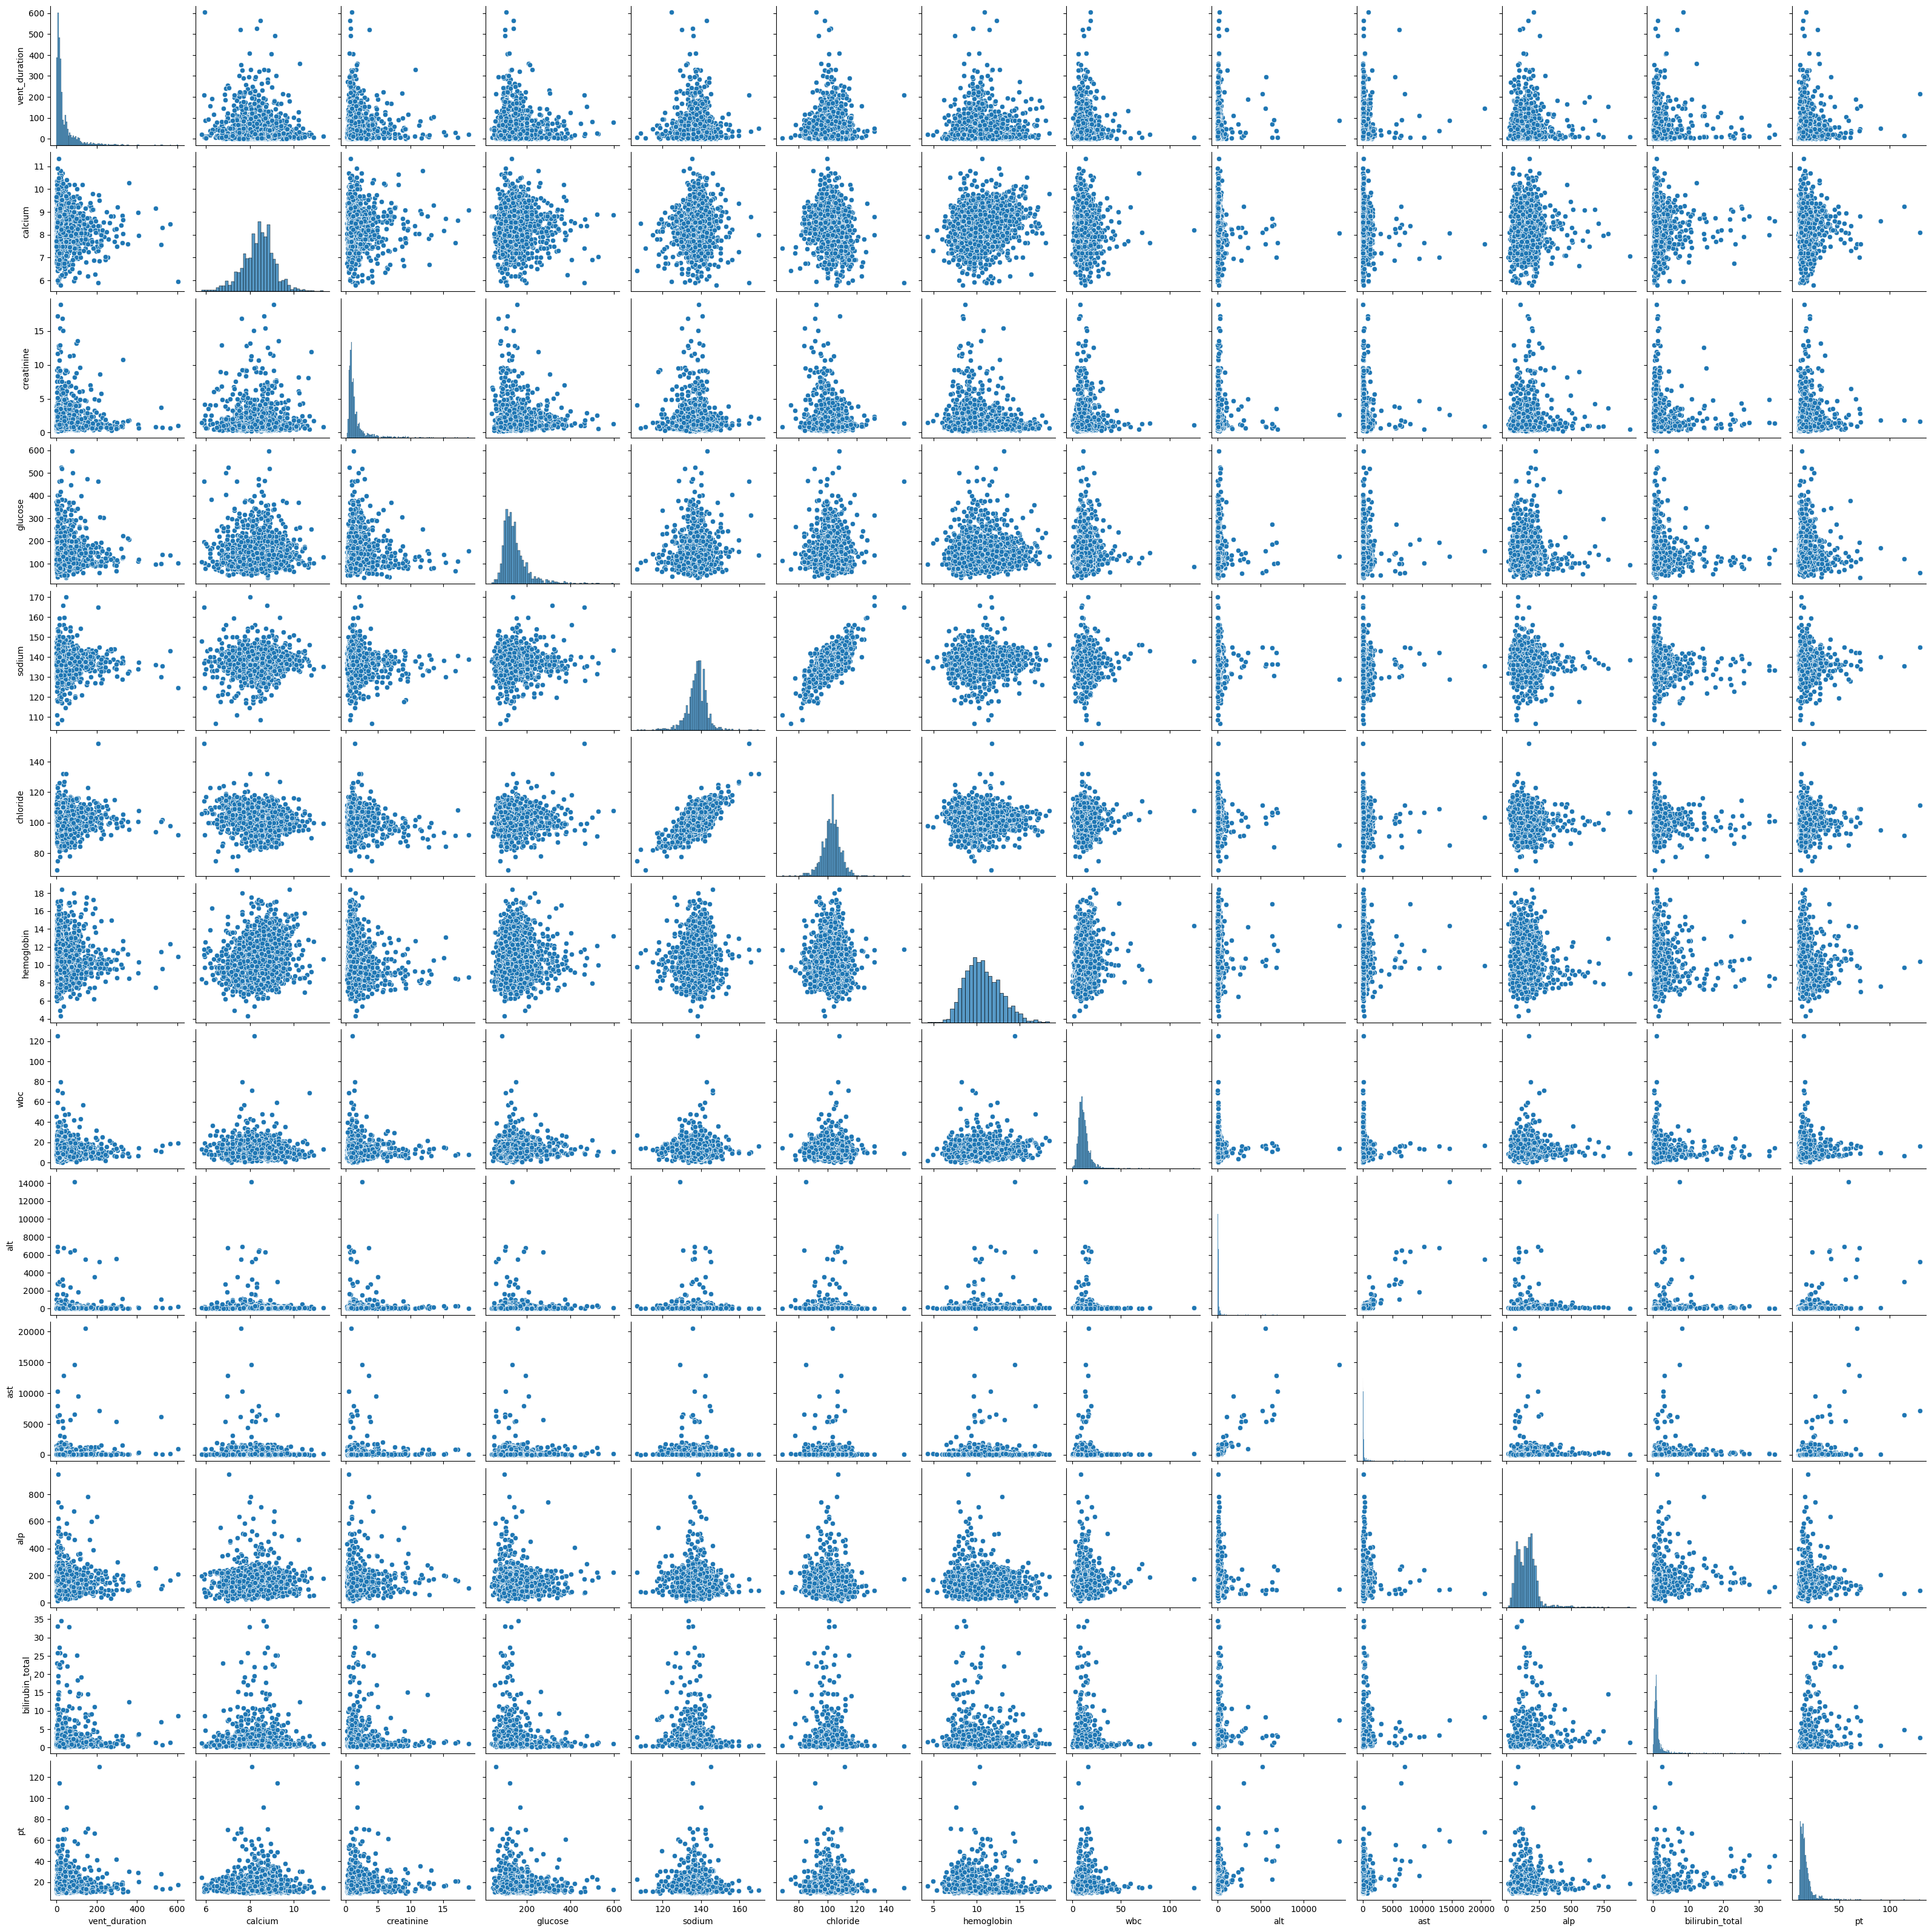

In [29]:
#Plotting pairplot to assess the relationship and distribution of each variable. 
sns.pairplot(data.loc[:,'vent_duration':'pt'])

Original Shape: (1923, 18)
Trimmed Shape: (1334, 18)


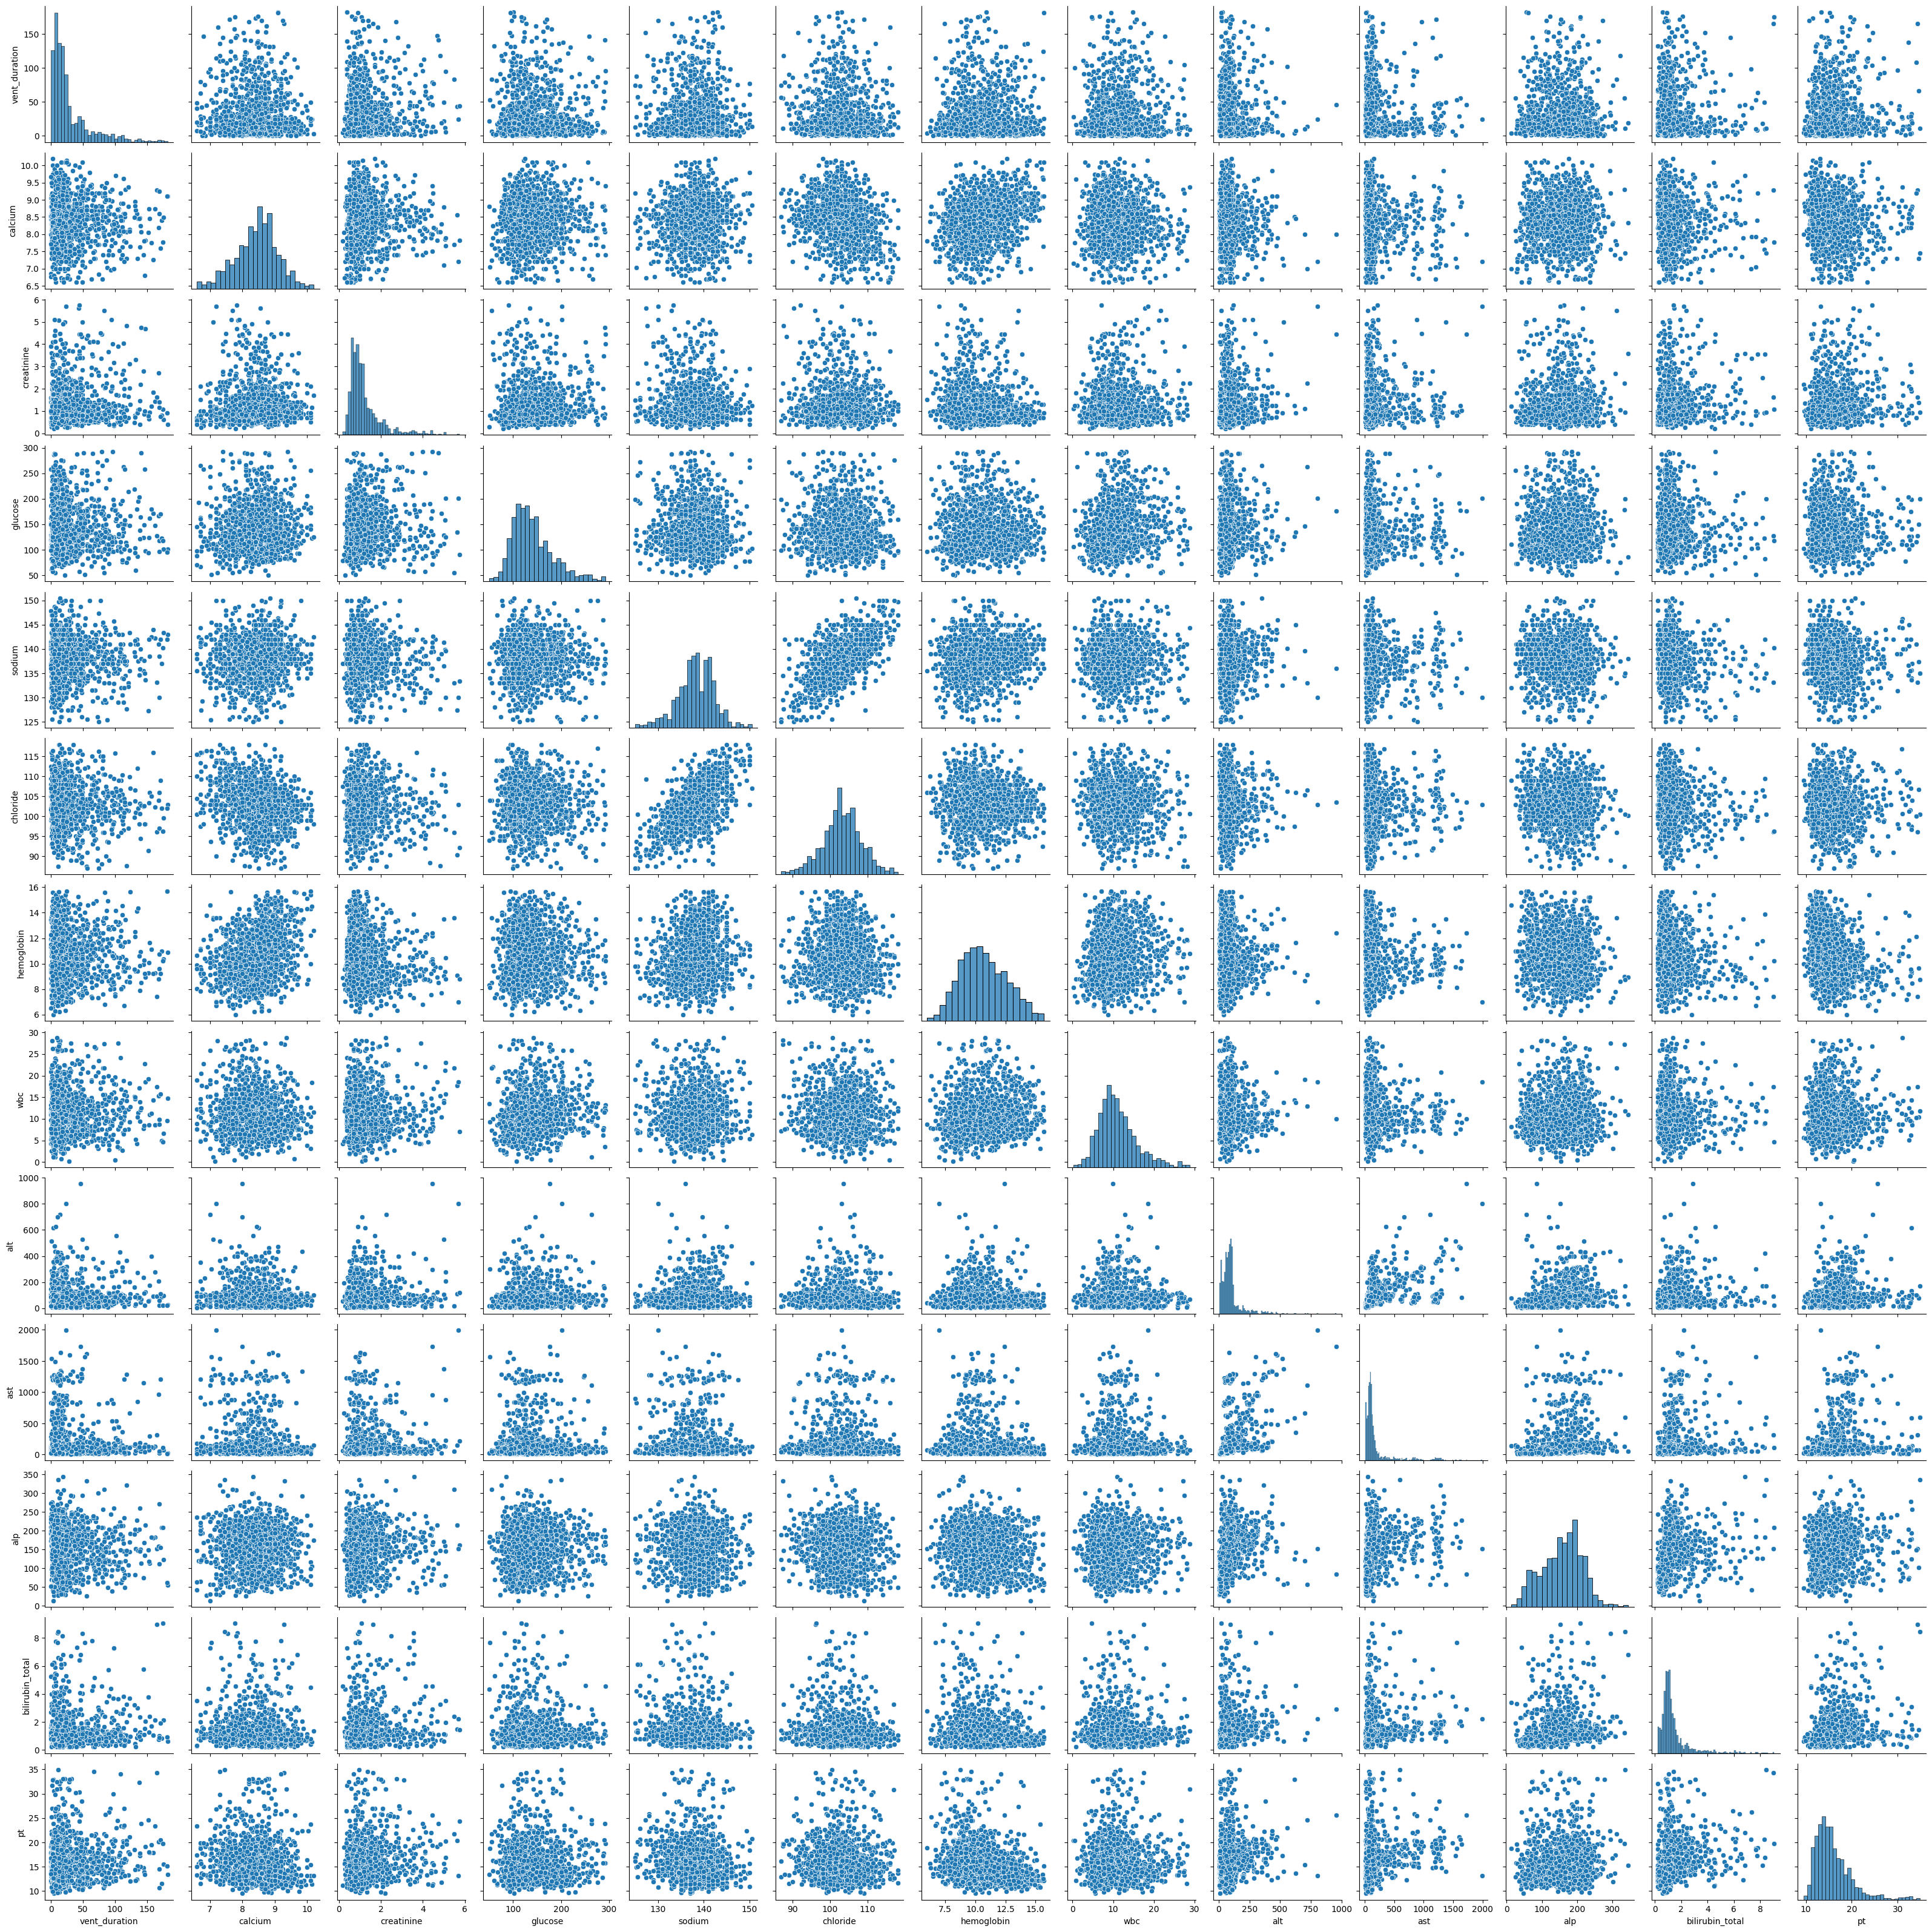

In [32]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[numeric_cols])

# Create a new dataframe with the scaled numeric columns
scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols, index=data.index)

# Identify outliers with z-scores greater than 2.5 or less than -2.5 (95%)
z_scores = (scaled_df - scaled_df.mean()) / scaled_df.std()
outliers = data[(z_scores > 2.5).any(axis=1) | (z_scores < -2.5).any(axis=1)]

# Remove outliers from the original dataframe
trimmed_df = data.drop(outliers.index)

print("Original Shape:", data.shape)
print("Trimmed Shape:", trimmed_df.shape)
print(sns.pairplot(trimmed_df.loc[:,'vent_duration':'pt']))

<Axes: >

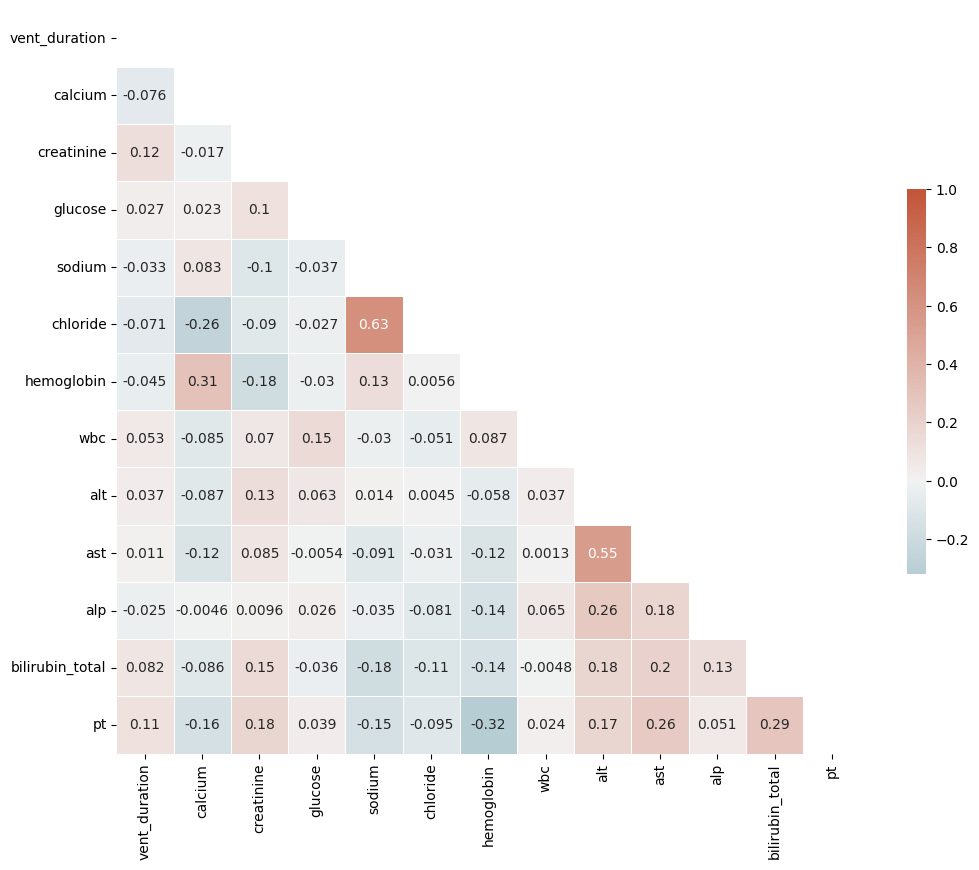

In [33]:
#Creating correlation matrix to observe the relationship between variables
trimmed_df_corr = trimmed_df.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(trimmed_df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(trimmed_df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


## To Discuss
### Correlation (Before trimming)
To consider dropping either of the variable that is highly correlated, to minimise over fitting. 
- Chloride and sodium have a very strong relationship with each other (0.71)
- ast and alt also have a very strong relationship with each other (0.85)

### Correlation (After trimming)
The relationship between Chloride and sodium have reduced after trimming the outliers from 0.71 to 0.63.
Not a very big change, so correlation not driven by outliers

However, for ast and alt though still one of the highly correlated variable. The correlation measured dropped from 0.85 to 0.55.
So the previous correlation is likely driven by the outliers. 

The caveat here is also we are assuming that the relationship across variables are linear. 

### Outliers
Rows with outlier observed were dropped. While that will reduce the sample size, but outlier can cause model to not perform well.
Currently the outliers were trimmed based on z-scores of -2.5 to 2.5.